# Exploratory Data Analysis (Data Story)


The data used here is the cleaned up version of the 2008 infant natality/mortality dataset. The cleaning steps are discussed in the data wrangling notebook and word document. This notebook shows steps to explore the data and concludes with data stories in terms of trends, correlations, etc.

In [1]:
import numpy as np
import pandas as pd
import os.path
import matplotlib
import matplotlib.pyplot as plt
import matplotlib.patches as patches
%matplotlib inline

In [2]:
#Load the cleaned up dataset.
final_2008 = pd.read_pickle('CleanData_ML_UC')

In [3]:
#Remove any spaces in the column names for easy manipulation.
final_2008.rename(columns=lambda x: x.strip(),inplace = True)

### Data Types

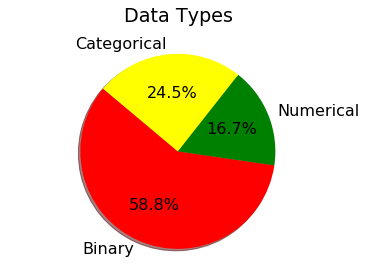

In [6]:
 # Data to plot
matplotlib.rcParams['axes.titlepad'] = 20 
matplotlib.rcParams['font.size'] = 16
labels = 'Binary', 'Numerical', 'Categorical'
sizes = [60, 17, 25]
colors = ['red','green', 'yellow']
plt.pie(sizes, labels=labels, colors=colors,
        autopct='%1.1f%%', shadow=True, startangle=140)
plt.title('Data Types') 
plt.axis('equal')
plt.savefig('category_ratio.eps',format = 'eps',dpi = 1300)
plt.show()

### Infant mortality vs infant non-mortality

The file has a flag which identifies an infant death (FLGND = 1). Lets look at the ratio of infant mortality to infant non-mortality.

In [4]:
final_2008['FLGND'].value_counts()

0    1562931
1       6831
Name: FLGND, dtype: int64

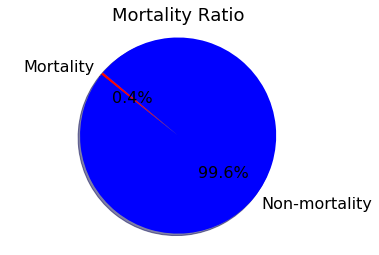

In [5]:
matplotlib.rcParams['font.size'] = 16
labels = 'Mortality', 'Non-mortality'
sizes = [6831, 1562931 ]
colors = ['red','blue']
 
# Plot
plt.pie(sizes, labels=labels, colors=colors,
        autopct='%1.1f%%', shadow=True, startangle=140)
 
plt.axis('equal')
plt.title('Mortality Ratio',fontsize=18)
plt.show()

The pie chart shows that only 0.4% of infants died in the US in the year 2008.

In [12]:
#Build a dictionary of values for each attribute to easily refer to them when in need or compare them to the 
#valid values.
values_dict = {}
for var in list(final_2008.columns):
    values_dict[var] = final_2008['%s' % var].value_counts().sort_index().to_dict()

In [62]:
#Forexample, lets look at the distribution of age of mothers and the attendant at time of delivery.
values_dict['MAGER'], values_dict['ATTEND']

({'12': 4,
  '13': 70,
  '14': 668,
  '15': 3318,
  '16': 9957,
  '17': 20281,
  '18': 36381,
  '19': 53680,
  '20': 61669,
  '21': 65605,
  '22': 72913,
  '23': 76778,
  '24': 80496,
  '25': 86517,
  '26': 90131,
  '27': 93500,
  '28': 95962,
  '29': 93289,
  '30': 90060,
  '31': 85557,
  '32': 77319,
  '33': 70604,
  '34': 62482,
  '35': 54661,
  '36': 47929,
  '37': 40089,
  '38': 31402,
  '39': 23612,
  '40': 16595,
  '41': 11232,
  '42': 7095,
  '43': 4495,
  '44': 2495,
  '45': 1351,
  '46': 689,
  '47': 366,
  '48': 202,
  '49': 128,
  '50': 180},
 {'1': 1355201, '2': 77089, '3': 116108, '4': 10124, '5': 11240})

In [64]:
final_2008['MAGER'].astype(float).mean(), final_2008['MAGER'].astype(float).median()

(28.000232519324584, 28.0)

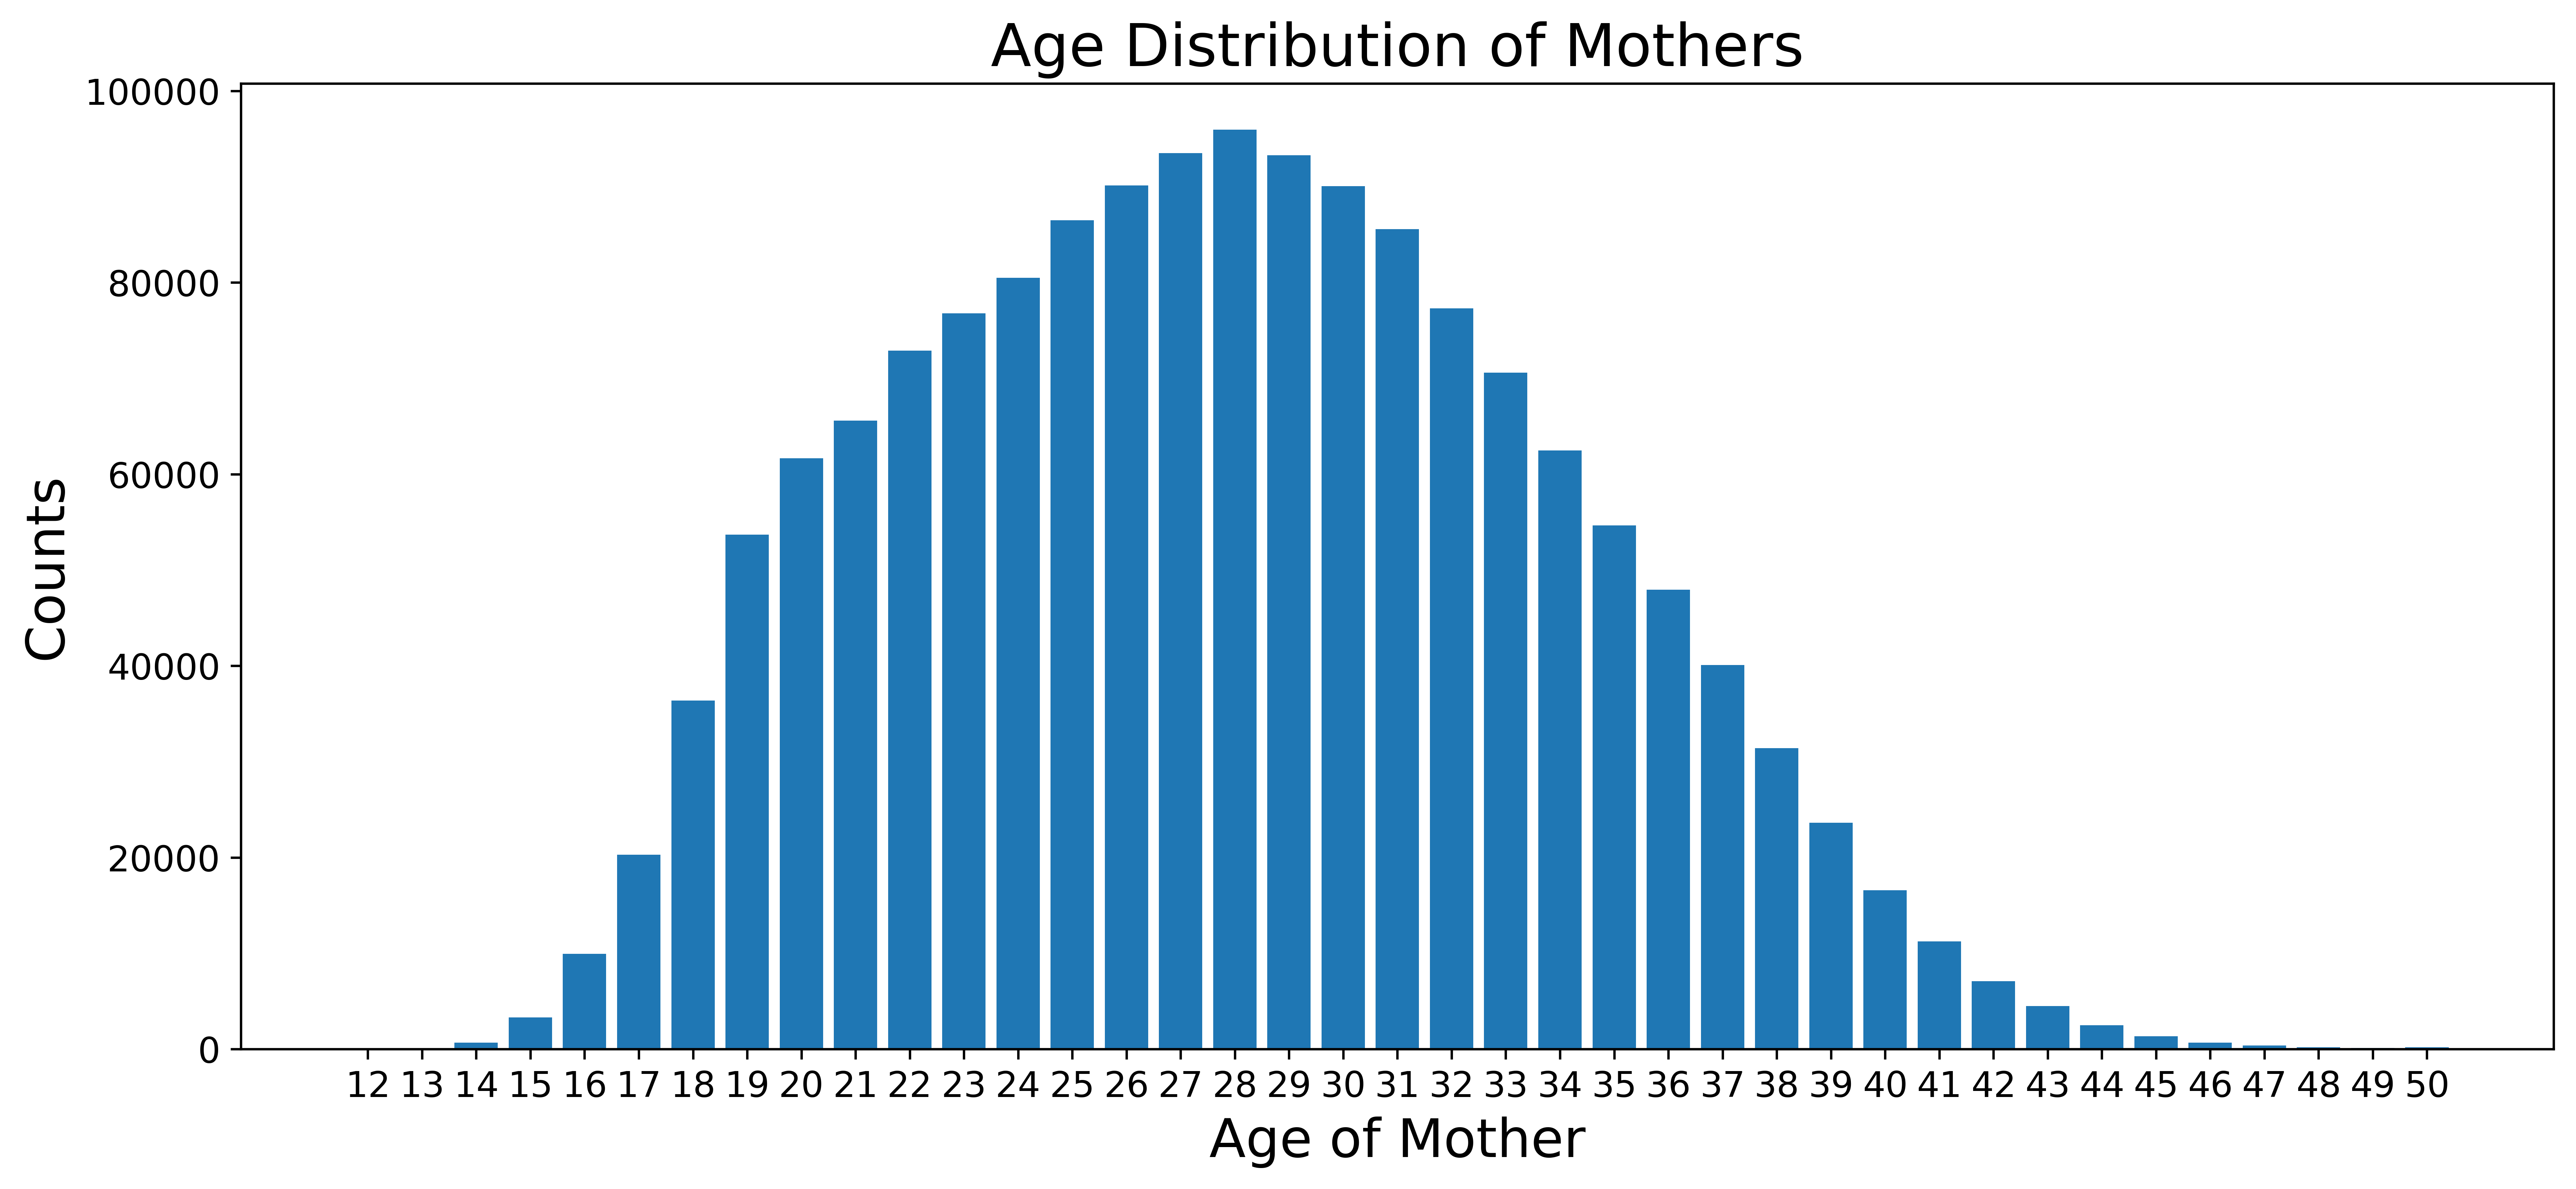

In [59]:
plt.figure(figsize=(14,6),dpi=600)
plt.bar(range(len(values_dict['MAGER'])), list(values_dict['MAGER'].values()), align='center')
plt.xlabel('Age of Mother',fontsize=18)
plt.ylabel('Counts',fontsize=18)
plt.xticks(range(len(values_dict['MAGER'])), list(values_dict['MAGER'].keys()),fontsize=12)
plt.yticks(fontsize=12)
plt.title("Age Distribution of Mothers",fontsize=20)
plt.show()

The plot shows that the youngest mothers are four individuals aged twelve or less. The oldest mothers are 180 mothers aged fifty or more. The distribution looks normal. The mean and median age of the mothers is 28. 

In [34]:
numerical_attribute = ['APGAR5','BRTHWGT','CIG_1','CIG_2','CIG_3','COMBGEST','DPLURAL','ESTGEST','FAGECOMB','LBO','MAGER',
                      'MEDUC','PRECARE','RF_CESARN','TBO','UPREVIS','WTGAIN']

In [40]:
final_2008[numerical_attribute].astype(float).describe()

,APGAR5,BRTHWGT,CIG_1,CIG_2,CIG_3,COMBGEST,DPLURAL,ESTGEST,FAGECOMB,LBO,MAGER,MEDUC,PRECARE,RF_CESARN,TBO,UPREVIS,WTGAIN
count,1.569762e+06,1.569762e+06,1.569762e+06,1.569762e+06,1.569762e+06,1.569762e+06,1.569762e+06,1.569762e+06,1.569762e+06,1.569762e+06,1.569762e+06,1.569762e+06,1.569762e+06,1.569762e+06,1.569762e+06,1.569762e+06,1.569762e+06
mean,8.820759e+00,3.300710e+03,9.441164e-01,7.138139e-01,6.456278e-01,3.868213e+01,1.034360e+00,3.853571e+01,3.051804e+01,2.056958e+00,2.800023e+01,4.129478e+00,3.035589e+00,1.761802e-01,2.400191e+00,1.125102e+01,3.368947e+01
std,7.594051e-01,5.682682e+02,3.933670e+00,3.231510e+00,3.044569e+00,2.335724e+00,1.908420e-01,1.981248e+00,6.987514e+00,1.199192e+00,6.003270e+00,1.765477e+00,1.495426e+00,5.039507e-01,1.488654e+00,3.825278e+00,1.940243e+01
min,0.000000e+00,2.290000e+02,0.000000e+00,0.000000e+00,0.000000e+00,1.700000e+01,1.000000e+00,3.000000e+00,1.000000e+01,1.000000e+00,1.200000e+01,1.000000e+00,0.000000e+00,0.000000e+00,1.000000e+00,0.000000e+00,0.000000e+00
25%,9.000000e+00,3.005000e+03,0.000000e+00,0.000000e+00,0.000000e+00,3.800000e+01,1.000000e+00,3.800000e+01,2.500000e+01,1.000000e+00,2.300000e+01,3.000000e+00,2.000000e+00,0.000000e+00,1.000000e+00,9.000000e+00,2.200000e+01
50%,9.000000e+00,3.331000e+03,0.000000e+00,0.000000e+00,0.000000e+00,3.900000e+01,1.000000e+00,3.900000e+01,3.000000e+01,2.000000e+00,2.800000e+01,4.000000e+00,3.000000e+00,0.000000e+00,2.000000e+00,1.100000e+01,3.100000e+01
75%,9.000000e+00,3.657000e+03,0.000000e+00,0.000000e+00,0.000000e+00,4.000000e+01,1.000000e+00,4.000000e+01,3.500000e+01,3.000000e+00,3.200000e+01,6.000000e+00,3.000000e+00,0.000000e+00,3.000000e+00,1.300000e+01,4.100000e+01
max,1.000000e+01,8.136000e+03,9.800000e+01,9.800000e+01,9.800000e+01,4.700000e+01,5.000000e+00,5.200000e+01,8.600000e+01,8.000000e+00,5.000000e+01,8.000000e+00,1.000000e+01,1.000000e+01,8.000000e+00,4.900000e+01,9.900000e+01


# Check Correlation between attributes and infant mortality

Apgar score

In [9]:
apgar = final_2008[["FLGND","APGAR5"]]

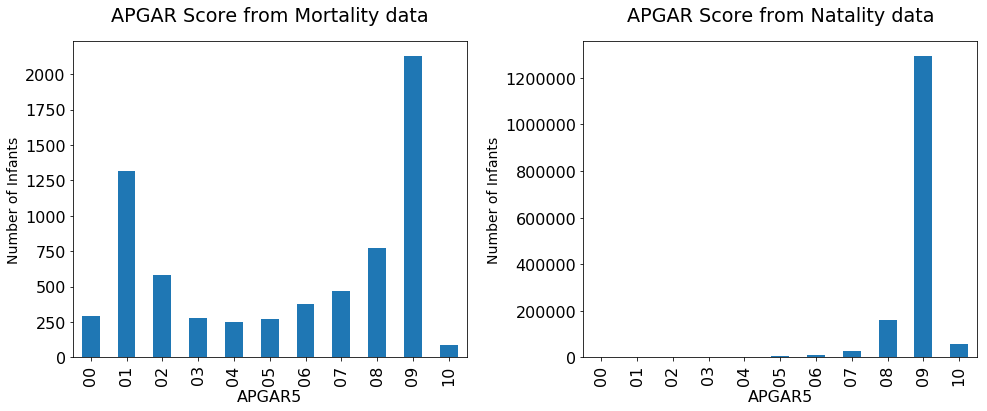

In [53]:
f, (ax1, ax2) = plt.subplots(1, 2, sharey=False)
f.subplots_adjust(hspace=5)
apgar[apgar.FLGND == '1'][['FLGND','APGAR5']].groupby(['APGAR5']).count().plot(kind='bar',ax= ax1,figsize=(14,6),title ="APGAR Score from Mortality data")
apgar[apgar.FLGND == '0'][['FLGND','APGAR5']].groupby(['APGAR5']).count().plot(kind='bar',ax = ax2,figsize=(14,6),title ="APGAR Score from Natality data")
ax1.set_ylabel('Number of Infants',fontsize=14)
ax2.set_ylabel('Number of Infants',fontsize=14)
ax1.legend_.remove()
ax2.legend_.remove()
plt.tight_layout()
plt.savefig('Apgar_score.eps',format = 'eps',dpi = 1300)

APGAR score is a measure of the physical condition of a newborn infant. The APGAR score from the mortality data shows a bimodal distribution with maximum counts at apgar score of 01 and 09. Normally, we do not expect an infant of high APGAR score to die. Lets see what were the three major causes of death of infants with high APGAR score.

In [11]:
final_2008[(final_2008['APGAR5'] == '09') & (final_2008['FLGND'] == '1')]['UC0D'].value_counts().head(3)

R95     491
R99     248
W75     137
Name: UC0D, dtype: int64

The three major cause of deaths for infants of high APGAR score are R95 (sudden infant death syndrom), R99 (other symptoms, signs, and abnormal clinical and laboratory findings, not classified elsewhere), and W75 (accidental suffocation or strangulation in bed)

Abnormal conditions of new born

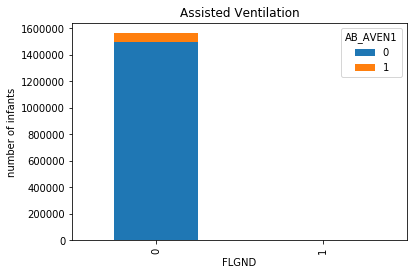

In [12]:
ax=final_2008[["FLGND","AB_AVEN1"]].groupby(["AB_AVEN1","FLGND"]).size().unstack().unstack().unstack().plot(kind='bar', stacked=True,title="Assisted Ventilation")
ax.set_ylabel("number of infants")

The number of infant deaths is only a small portion of the infant birth and it is difficult to see the bar chart. It is better to use different scales for the mortality and natality data

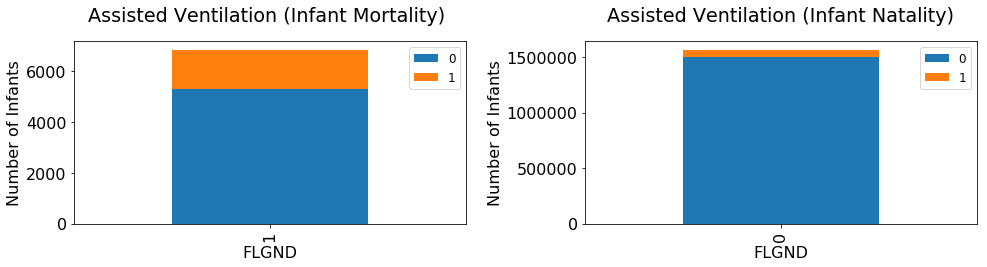

In [76]:
AB_AVEN1=final_2008[['AB_AVEN1','FLGND']]
f, (ax1, ax2) = plt.subplots(1, 2, sharey=False)
AB_AVEN1[AB_AVEN1.FLGND == '1'][['FLGND','AB_AVEN1']].groupby(['AB_AVEN1','FLGND']).size().unstack().unstack().unstack().plot(kind='bar', ax=ax1,figsize=(14,4),stacked=True,title="Assisted Ventilation (Infant Mortality) ")
AB_AVEN1[AB_AVEN1.FLGND == '0'][['FLGND','AB_AVEN1']].groupby(['AB_AVEN1','FLGND']).size().unstack().unstack().unstack().plot(kind='bar', ax=ax2,figsize=(14,4),stacked=True,title="Assisted Ventilation (Infant Natality)")
ax1.set_ylabel('Number of Infants')
ax2.set_ylabel('Number of Infants')
ax1.legend(fontsize=12)
ax2.legend(fontsize=12)
plt.tight_layout()
plt.savefig('AB_AVEN1.eps',format = 'eps',dpi = 1300)

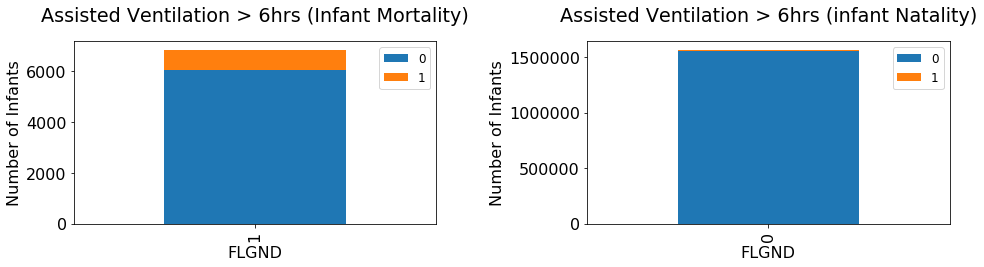

In [77]:
AB_AVEN6=final_2008[['AB_AVEN6','FLGND']]
f, (ax1, ax2) = plt.subplots(1, 2, sharey=False)
AB_AVEN6[AB_AVEN6.FLGND == '1'][['FLGND','AB_AVEN6']].groupby(['AB_AVEN6','FLGND']).size().unstack().unstack().unstack().plot(kind='bar', ax=ax1,figsize=(14,4),stacked=True,title="Assisted Ventilation > 6hrs (Infant Mortality)")
AB_AVEN6[AB_AVEN6.FLGND == '0'][['FLGND','AB_AVEN6']].groupby(['AB_AVEN6','FLGND']).size().unstack().unstack().unstack().plot(kind='bar', ax=ax2,figsize=(14,4),stacked=True,title="Assisted Ventilation > 6hrs (infant Natality)")
ax1.set_ylabel('Number of Infants')
ax2.set_ylabel('Number of Infants')
ax1.legend(fontsize=12)
ax2.legend(fontsize=12)
plt.tight_layout()
plt.savefig('AB_AVEN6.eps',format = 'eps',dpi = 1300)

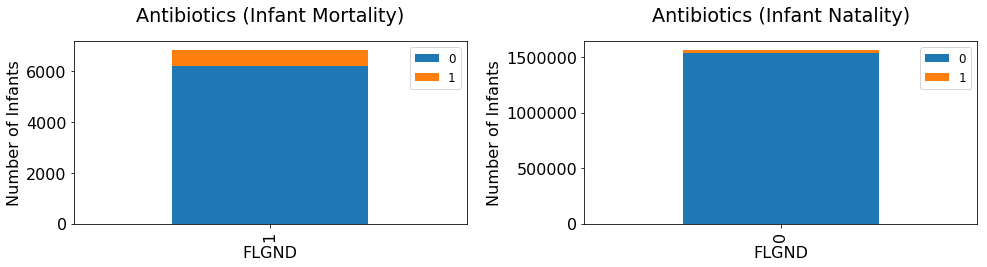

In [70]:
AB_ANTI=final_2008[['AB_ANTI','FLGND']]
f, (ax1, ax2) = plt.subplots(1, 2, sharey=False)
AB_ANTI[AB_ANTI.FLGND == '1'][['FLGND','AB_ANTI']].groupby(['AB_ANTI','FLGND']).size().unstack().unstack().unstack().plot(kind='bar', ax=ax1,figsize=(14,4),stacked=True,title="Antibiotics (Infant Mortality)")
AB_ANTI[AB_ANTI.FLGND == '0'][['FLGND','AB_ANTI']].groupby(['AB_ANTI','FLGND']).size().unstack().unstack().unstack().plot(kind='bar', ax=ax2,figsize=(14,4),stacked=True,title="Antibiotics (Infant Natality)")
ax1.set_ylabel('Number of Infants')
ax2.set_ylabel('Number of Infants')
ax1.legend(fontsize=12)
ax2.legend(fontsize=12)
plt.tight_layout()
plt.savefig('AB_ANTI.eps',format = 'eps',dpi = 1300)

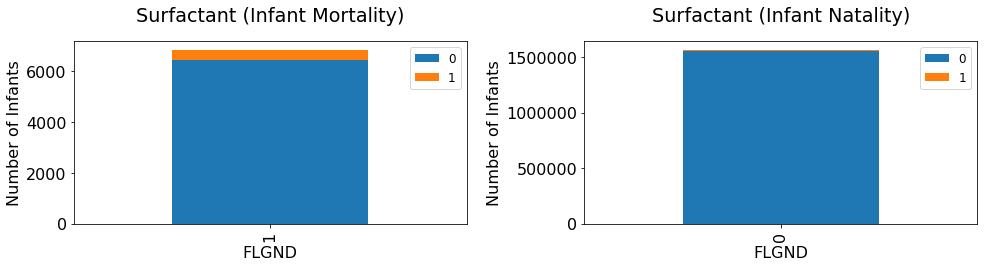

In [71]:
AB_SURF=final_2008[['AB_SURF','FLGND']]
f, (ax1, ax2) = plt.subplots(1, 2, sharey=False)
AB_SURF[AB_SURF.FLGND == '1'][['FLGND','AB_SURF']].groupby(['AB_SURF','FLGND']).size().unstack().unstack().unstack().plot(kind='bar', ax=ax1,figsize=(14,4),stacked=True,title="Surfactant (Infant Mortality)")
AB_SURF[AB_SURF.FLGND == '0'][['FLGND','AB_SURF']].groupby(['AB_SURF','FLGND']).size().unstack().unstack().unstack().plot(kind='bar', ax=ax2,figsize=(14,4),stacked=True,title="Surfactant (Infant Natality)")
ax1.set_ylabel('Number of Infants')
ax2.set_ylabel('Number of Infants')
ax1.legend(fontsize=12)
ax2.legend(fontsize=12)
plt.tight_layout()
plt.savefig('AB_SURF.eps',format = 'eps',dpi = 1300)

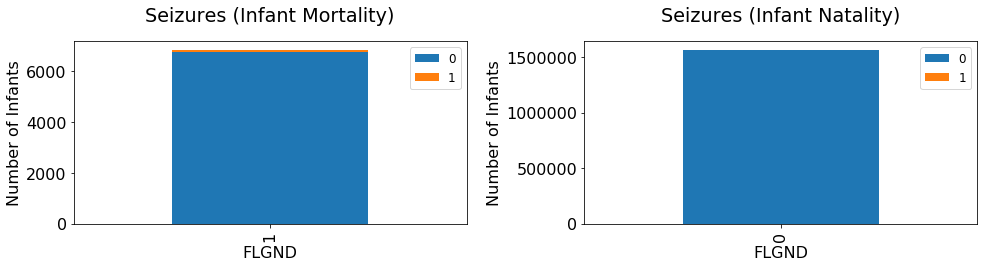

In [72]:
AB_SEIZ=final_2008[['AB_SEIZ','FLGND']]
f, (ax1, ax2) = plt.subplots(1, 2, sharey=False)
AB_SEIZ[AB_SURF.FLGND == '1'][['FLGND','AB_SEIZ']].groupby(['AB_SEIZ','FLGND']).size().unstack().unstack().unstack().plot(kind='bar', ax=ax1,figsize=(14,4),stacked=True,title="Seizures (Infant Mortality)")
AB_SEIZ[AB_SURF.FLGND == '0'][['FLGND','AB_SEIZ']].groupby(['AB_SEIZ','FLGND']).size().unstack().unstack().unstack().plot(kind='bar', ax=ax2,figsize=(14,4),stacked=True,title="Seizures (Infant Natality)")
ax1.set_ylabel('Number of Infants')
ax2.set_ylabel('Number of Infants')
ax1.legend(fontsize=12)
ax2.legend(fontsize=12)
plt.tight_layout()
plt.savefig('AB_SEIZ.eps',format = 'eps',dpi = 1300)

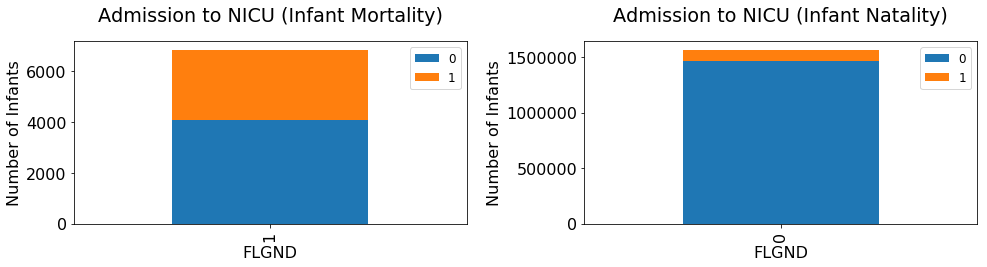

In [73]:
AB_NICU=final_2008[['AB_NICU','FLGND']]
f, (ax1, ax2) = plt.subplots(1, 2, sharey=False)
AB_NICU[AB_NICU.FLGND == '1'][['FLGND','AB_NICU']].groupby(['AB_NICU','FLGND']).size().unstack().unstack().unstack().plot(kind='bar', ax=ax1,figsize=(14,4),stacked=True,title="Admission to NICU (Infant Mortality)")
AB_NICU[AB_NICU.FLGND == '0'][['FLGND','AB_NICU']].groupby(['AB_NICU','FLGND']).size().unstack().unstack().unstack().plot(kind='bar', ax=ax2,figsize=(14,4),stacked=True,title="Admission to NICU (Infant Natality)")
ax1.set_ylabel('Number of Infants')
ax2.set_ylabel('Number of Infants')
ax1.legend(fontsize=12)
ax2.legend(fontsize=12)
plt.tight_layout()
plt.savefig('AB_NICU.eps',format = 'eps',dpi = 1300)

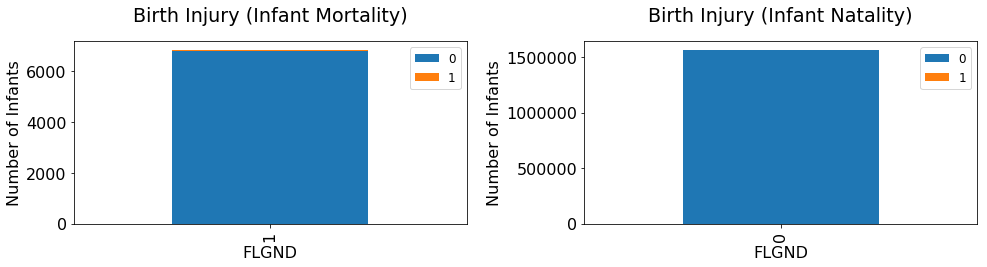

In [74]:
AB_BINJ=final_2008[['AB_BINJ','FLGND']]
f, (ax1, ax2) = plt.subplots(1, 2, sharey=False)
AB_BINJ[AB_BINJ.FLGND == '1'][['FLGND','AB_BINJ']].groupby(['AB_BINJ','FLGND']).size().unstack().unstack().unstack().plot(kind='bar', ax=ax1,figsize=(14,4),stacked=True,title="Birth Injury (Infant Mortality)")
AB_BINJ[AB_BINJ.FLGND == '0'][['FLGND','AB_BINJ']].groupby(['AB_BINJ','FLGND']).size().unstack().unstack().unstack().plot(kind='bar', ax=ax2,figsize=(14,4),stacked=True,title="Birth Injury (Infant Natality)")
ax1.set_ylabel('Number of Infants')
ax2.set_ylabel('Number of Infants')
ax1.legend(fontsize=12)
ax2.legend(fontsize=12)
plt.tight_layout()
plt.savefig('AB_BINJ.eps',format = 'eps',dpi = 1300)

The bar charts above show a significant amount of infant deaths in cases that reported admission to NICU and administration of assisted ventilation

Birth Weight

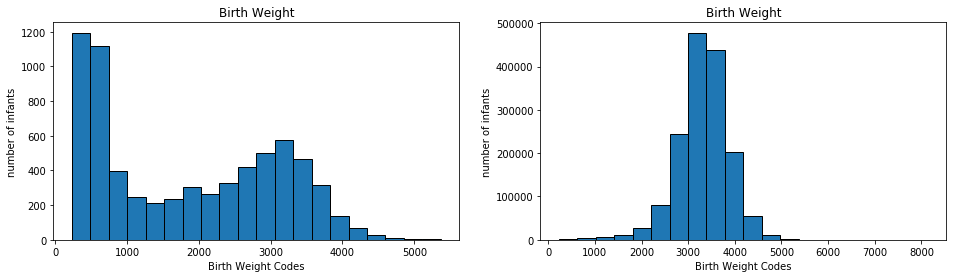

In [20]:
BWTR14 = final_2008[["FLGND","BRTHWGT"]]
f, (ax1, ax2) = plt.subplots(1, 2, sharey=False)
BWTR14[BWTR14.FLGND == '1'][['BRTHWGT']].plot(kind='hist',bins = 20, ec='black',ax= ax1,figsize=(16,4), title="Birth Weight")
BWTR14[BWTR14.FLGND == '0'][['BRTHWGT']].plot(kind='hist',bins = 20, ec='black',ax= ax2,figsize=(16,4), title="Birth Weight")
ax1.set_xlabel('Birth Weight Codes')
ax2.set_xlabel('Birth Weight Codes')
ax1.set_ylabel('number of infants')
ax2.set_ylabel('number of infants')
ax1.legend_.remove()
ax2.legend_.remove()

The birth weight bar chart from the infant mortality data shows higher number of infants that weighed less that 750 grams (bins 01 and 02). The birth weight chart shows a distribution that looks normally distributed.

Gestation

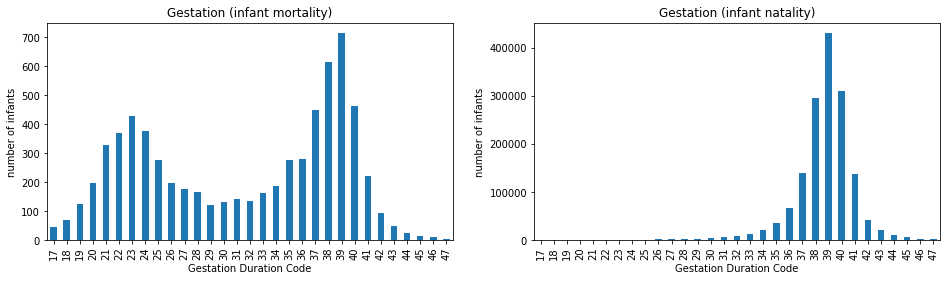

In [21]:
GESTREC10 = final_2008[["FLGND","COMBGEST"]]
f, (ax1, ax2) = plt.subplots(1, 2, sharey=False)
GESTREC10[GESTREC10.FLGND == '1'][['FLGND','COMBGEST']].groupby(['COMBGEST']).count().plot(kind='bar',ax= ax1,figsize=(16,4),title="Gestation (infant mortality)")
GESTREC10[GESTREC10.FLGND == '0'][['FLGND','COMBGEST']].groupby(['COMBGEST']).count().plot(kind='bar',ax = ax2,figsize=(16,4),title="Gestation (infant natality)")
ax1.set_xlabel("Gestation Duration Code")
ax2.set_xlabel("Gestation Duration Code")
ax1.set_ylabel("number of infants")
ax2.set_ylabel("number of infants")
ax1.legend_.remove()
ax2.legend_.remove()

The gestation bar chart from the infant mortality data shows higher number of infants with gestation period of less than 27 weeks (bin 02).

Pre-pregnancy diabetes

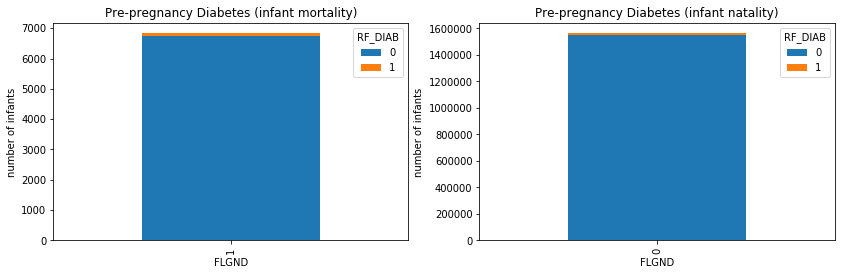

In [22]:
RF_DIAB=final_2008[['RF_DIAB','FLGND']]
f, (ax1, ax2) = plt.subplots(1, 2, sharey=False)
RF_DIAB[RF_DIAB.FLGND == '1'][['FLGND','RF_DIAB']].groupby(['RF_DIAB','FLGND']).size().unstack().unstack().unstack().plot(kind='bar', ax=ax1,figsize=(14,4),stacked=True,title="Pre-pregnancy Diabetes (infant mortality)")
RF_DIAB[RF_DIAB.FLGND == '0'][['FLGND','RF_DIAB']].groupby(['RF_DIAB','FLGND']).size().unstack().unstack().unstack().plot(kind='bar', ax=ax2,figsize=(14,4),stacked=True,title="Pre-pregnancy Diabetes (infant natality)")
ax1.set_ylabel("number of infants")
ax2.set_ylabel("number of infants")

Gestational diabetes

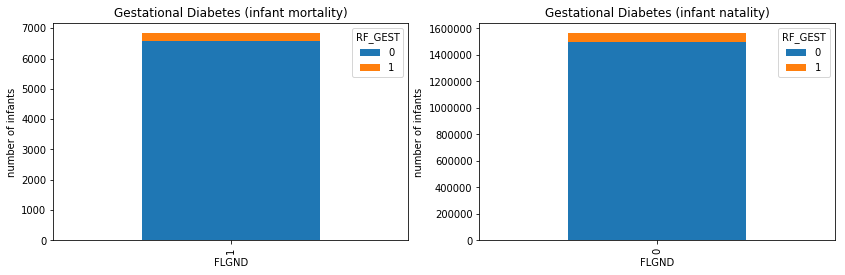

In [23]:
RF_GEST=final_2008[['RF_GEST','FLGND']]
f, (ax1, ax2) = plt.subplots(1, 2, sharey=False)
RF_GEST[RF_GEST.FLGND == '1'][['FLGND','RF_GEST']].groupby(['RF_GEST','FLGND']).size().unstack().unstack().unstack().plot(kind='bar', ax=ax1,figsize=(14,4),stacked=True,title="Gestational Diabetes (infant mortality)")
RF_GEST[RF_GEST.FLGND == '0'][['FLGND','RF_GEST']].groupby(['RF_GEST','FLGND']).size().unstack().unstack().unstack().plot(kind='bar', ax=ax2,figsize=(14,4),stacked=True,title="Gestational Diabetes (infant natality)")
ax1.set_ylabel("number of infants")
ax2.set_ylabel("number of infants")

Pre-pregnancy hypertension

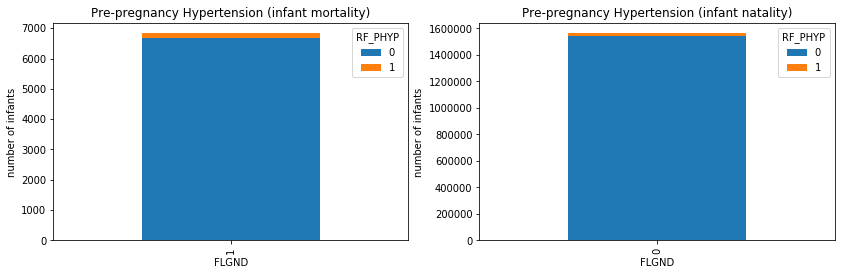

In [24]:
RF_PHYP=final_2008[['RF_PHYP','FLGND']]
f, (ax1, ax2) = plt.subplots(1, 2, sharey=False)
RF_PHYP[RF_PHYP.FLGND == '1'][['FLGND','RF_PHYP']].groupby(['RF_PHYP','FLGND']).size().unstack().unstack().unstack().plot(kind='bar', ax=ax1,figsize=(14,4),stacked=True,title="Pre-pregnancy Hypertension (infant mortality)")
RF_PHYP[RF_PHYP.FLGND == '0'][['FLGND','RF_PHYP']].groupby(['RF_PHYP','FLGND']).size().unstack().unstack().unstack().plot(kind='bar', ax=ax2,figsize=(14,4),stacked=True,title="Pre-pregnancy Hypertension (infant natality)")
ax1.set_ylabel("number of infants")
ax2.set_ylabel("number of infants")

Gestational hypertension

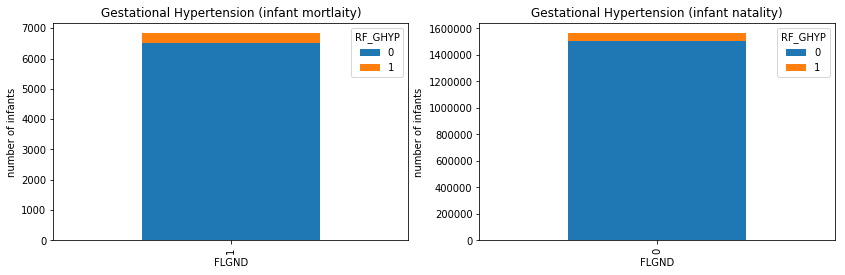

In [25]:
RF_GHYP=final_2008[['RF_GHYP','FLGND']]
f, (ax1, ax2) = plt.subplots(1, 2, sharey=False)
RF_GHYP[RF_GHYP.FLGND == '1'][['FLGND','RF_GHYP']].groupby(['RF_GHYP','FLGND']).size().unstack().unstack().unstack().plot(kind='bar', ax=ax1,figsize=(14,4),stacked=True,title="Gestational Hypertension (infant mortlaity)")
RF_GHYP[RF_GHYP.FLGND == '0'][['FLGND','RF_GHYP']].groupby(['RF_GHYP','FLGND']).size().unstack().unstack().unstack().plot(kind='bar', ax=ax2,figsize=(14,4),stacked=True,title="Gestational Hypertension (infant natality)")
ax1.set_ylabel("number of infants")
ax2.set_ylabel("number of infants")

### Conclusion

The National Center for Health Statistics (NCHS) collects and performs statistical analysis of birth and infant death in the US and its territories on a yearly basis. Most of the infant deaths are linked to the birth files providing a publicly available good data set for any one interested in detailed investigation of infant death in the country. The dataset for this project is the 2008 infant mortality/non-mortality for the US. The dataset has 1,569,762 rows (records) and 102 columns (features). The data type of the attributes are 60 binary, 25 categorical, and 17 numerical. <br/><br/> The data includes information collected at each stage of the life of an infant including maternal risk factors, pregnancy-related health data, delivery procedures and complications, and anomalies at birth. In addition, it has an attribute (a flag) that shows whether the child died as an infant. The dataset shows there was a 0.4% infant death for the year 2008. <br/><br/> This notebook shows the distribution and trends of selected features including mothers' age, apgar score, and various infant health anomalies. The histograms and bar charts show the distribution of gestation, birth weight, apgar score, and anomalies are different for the mortality and non-mortality dataset. Both the birth weight, apgar score, and gestation period are normally distributed for non-mortality while displaying a bi-modal distribution for the mortality dataset. <br/><br/> An interesting observation is the presence of high count of mortality for infants with high apgar score. This leads to question what the cause of death for infants with high apgar score could be: is the cause of death something whose importance could not be captured in apgar score (something which can not be shown on infants **A**ppearance, **P**ulse, **G**rimace, **A**ctivity and **R**espiration). The three major cause of deaths for infants of high APGAR score are R95 (sudden infant death syndrom), R99 (other symptoms, signs, and abnormal clinical and laboratory findings, not classified elsewhere), and W75 (accidental suffocation or strangulation in bed). Those causes of death can not be assessed using APGAR measurements (Appearance, Pulse, etc). The main goal of this capstone project is identify the most important features, and use machine learning to predict infant mortality/non-mortality.